In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#get the data

training_data = pd.read_csv('//content//drive//My Drive//BDMH//train.csv') 
testing_data = pd.read_csv('//content//drive//My Drive//BDMH//test.csv')

In [3]:
training_data.shape

(279, 60485)

In [0]:
# training_data.head()

In [5]:
testing_data.head()

,id,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000231981.3,ENSG00000269475.2,ENSG00000201788.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,ENSG00000234943.2,ENSG00000240423.1,ENSG00000060642.9,ENSG00000271616.1,ENSG00000234881.1,ENSG00000236040.1,ENSG00000231105.1,ENSG00000243044.1,ENSG00000182141.8,ENSG00000269416.4,ENSG00000264981.1,ENSG00000275265.1,ENSG00000185105.4,ENSG00000233540.1,ENSG00000102174.8,ENSG00000271647.1,ENSG00000166391.13,ENSG00000270469.1,ENSG00000070087.12,ENSG00000262950.1,ENSG00000255420.1,ENSG00000280038.1,...,ENSG00000279778.1,ENSG00000223671.2,ENSG00000134470.18,ENSG00000263573.1,ENSG00000222213.1,ENSG00000214124.3,ENSG00000206836.1,ENSG00000066044.12,ENSG00000264491.1,ENSG00000146587.16,ENSG00000278151.1,ENSG00000228658.1,ENSG00000173930.8,ENSG00000107863.15,ENSG00000199892.2,ENSG00000221760.1,ENSG00000253333.1,ENSG00000213782.6,ENSG00000146707.13,ENSG00000212084.2,ENSG00000248838.2,ENSG00000135094.9,ENSG00000255083.1,ENSG00000223665.1,ENSG00000231612.1,ENSG00000238300.1,ENSG00000267200.1,ENSG00000203729.7,ENSG00000272515.1,ENSG00000009694.12,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,3001,0.000000,0.006764,1.68576,0.0,1.046760,2.56965,0,0.000000,5.38054,0.000000,0.046819,0.0,0,3.58103,0.055638,0.000000,3.72403,0.089203,0.027188,3.25170,0.0,0.0,0.0,0.094775,0,0.556439,0.020898,0.0,0.074298,0.014045,0.000000,0.114854,0.0,4.577280,0.000000,2.790900,0.000000,0,0.000000,...,0.055122,0.0,2.38341,0.0,0.0,0.138859,0.0,2.68180,0.0,1.321590,0,0,0.076007,1.96427,0.0,0.0,0.000000,0.274918,0.637475,0,0.0,9.36480,0.000000,0.0,0.00000,0.000000,0,0.000000,0.00000,0.890635,0,6.30029,0,0.076595,0.000000,3.02069,0.196880,0,0.538068,0.0
1,3002,0.247055,0.000000,1.89639,0.0,1.996530,2.47638,0,0.016952,5.98824,0.228977,0.000000,0.0,0,3.88829,0.022174,0.036970,5.63139,0.000000,0.000000,1.92491,0.0,0.0,0.0,0.038082,0,0.231347,0.000000,0.0,0.000000,0.000000,0.152675,0.124350,0.0,0.581713,0.000000,1.208350,0.000000,0,0.000000,...,0.020512,0.0,2.62413,0.0,0.0,0.000000,0.0,2.89655,0.0,1.166620,0,0,0.286427,1.62729,0.0,0.0,0.000000,0.183897,0.945893,0,0.0,8.82558,0.039959,0.0,0.13605,0.000000,0,0.042460,0.00000,0.046231,0,5.04563,0,0.137816,0.000000,3.56454,0.397989,0,0.574163,0.0
2,3003,0.026951,0.000000,1.80290,0.0,1.568690,1.90269,0,0.007726,5.97967,0.096880,0.000000,0.0,0,4.60587,0.145780,0.044668,3.92839,0.000000,0.000000,2.96144,0.0,0.0,0.0,0.000000,0,0.589913,0.342651,0.0,0.082496,0.015631,0.225325,0.205505,0.0,2.871280,0.000000,3.740750,0.028376,0,0.005754,...,0.452739,0.0,1.47090,0.0,0.0,0.000000,0.0,2.98594,0.0,1.391490,0,0,1.319570,2.54970,0.0,0.0,0.282757,0.145683,1.875370,0,0.0,9.17941,0.000000,0.0,0.00000,0.220681,0,0.000000,0.11190,0.821460,0,6.00935,0,0.000000,0.044642,3.64769,0.217624,0,0.135791,0.0
3,3004,0.000000,0.000000,1.51205,0.0,0.938359,1.81372,0,0.003923,6.46130,0.000000,0.000000,0.0,0,3.54453,0.000000,0.162988,3.75278,0.000000,0.000000,2.78831,0.0,0.0,0.0,0.000000,0,0.244819,0.000000,0.0,0.063180,0.000000,0.207027,0.004596,0.0,3.612930,0.000000,0.978969,0.000000,0,0.000000,...,0.065141,0.0,1.62822,0.0,0.0,0.000000,0.0,2.46364,0.0,0.970776,0,0,0.010976,1.08158,0.0,0.0,0.000000,0.175459,1.471490,0,0.0,4.76027,0.000000,0.0,0.00000,0.000000,0,0.077311,0.00000,0.002277,0,5.51651,0,0.127467,0.000000,2.88242,0.612775,0,0.807993,0.0
4,3005,0.643548,0.000000,1.35997,0.0,1.254810,3.64841,0,0.128797,6.27939,0.033555,0.000000,0.0,0,4.64838,0.083154,0.030416,4.05267,0.132574,0.000000,3.20535,0.0,0.0,0.0,0.041627,0,0.934724,0.492960,0.0,0.110695,0.041978,0.000000,0.786331,0.0,2.278860,0.317394,3.630710,0.000000,0,0.000000,...,0.856820,0.0,3.22773,0.0,0.0,0.000000,0.0,3.29396,0.0,1.730040,0,0,0.331706,2

In [0]:
#droping the id col as it is just a unique name !!!  

training_data = training_data.drop(['id'],axis=1)

In [7]:
training_data.head()

,Label,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000231981.3,ENSG00000269475.2,ENSG00000201788.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,ENSG00000234943.2,ENSG00000240423.1,ENSG00000060642.9,ENSG00000271616.1,ENSG00000234881.1,ENSG00000236040.1,ENSG00000231105.1,ENSG00000243044.1,ENSG00000182141.8,ENSG00000269416.4,ENSG00000264981.1,ENSG00000275265.1,ENSG00000185105.4,ENSG00000233540.1,ENSG00000102174.8,ENSG00000271647.1,ENSG00000166391.13,ENSG00000270469.1,ENSG00000070087.12,ENSG00000262950.1,ENSG00000255420.1,ENSG00000280038.1,...,ENSG00000279778.1,ENSG00000223671.2,ENSG00000134470.18,ENSG00000263573.1,ENSG00000222213.1,ENSG00000214124.3,ENSG00000206836.1,ENSG00000066044.12,ENSG00000264491.1,ENSG00000146587.16,ENSG00000278151.1,ENSG00000228658.1,ENSG00000173930.8,ENSG00000107863.15,ENSG00000199892.2,ENSG00000221760.1,ENSG00000253333.1,ENSG00000213782.6,ENSG00000146707.13,ENSG00000212084.2,ENSG00000248838.2,ENSG00000135094.9,ENSG00000255083.1,ENSG00000223665.1,ENSG00000231612.1,ENSG00000238300.1,ENSG00000267200.1,ENSG00000203729.7,ENSG00000272515.1,ENSG00000009694.12,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,-1,1.322600,0.000000,2.60713,0,1.411440,3.27352,0,0.006410,6.96102,0.264955,0.0,0.0,0,4.04969,0.022276,0.176815,5.09864,0.082564,0.144571,2.46391,0.0,0.0,0.0,0.135572,0.0,0.507062,0.057167,0,0.197116,0.088461,0.078709,0.078133,0.0,0.068028,0.000000,1.23604,0.0,0.0,0.000000,...,0.372853,0.0,4.20269,0,0.0,0.000000,0.0,3.12244,0.068012,1.26145,0,0.0,0.387419,1.79670,0.0,0.0,0.729756,0.250288,1.060580,0,0.0,2.33991,0.0,0.0,0.000000,0.0,0.0,0.0,0.047456,1.194040,0,2.710970,0.0,0.435580,0.000000,3.90541,0.017601,0,1.708020,0.0
1,1,0.000000,0.006431,1.49737,0,0.598584,2.39426,0,0.006599,5.36203,0.000000,0.0,0.0,0,3.14155,0.052944,0.000000,4.08862,0.165141,0.000000,2.02220,0.0,0.0,0.0,0.026366,0.0,0.665222,0.009972,0,0.000000,0.013356,0.000000,0.085255,0.0,0.471577,0.000000,1.38306,0.0,0.0,0.000000,...,0.010644,0.0,1.07055,0,0.0,0.000000,0.0,3.60752,0.000000,1.58036,0,0.0,0.942195,2.10154,0.0,0.0,0.000000,0.131263,1.240940,0,0.0,5.27446,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.057654,0,0.812853,0.0,0.208534,0.147081,4.05334,0.368102,0,0.182464,0.0
2,1,0.000000,0.000000,1.28544,0,1.366550,2.36780,0,0.005341,5.58494,0.100262,0.0,0.0,0,3.95277,0.099345,0.000000,3.76403,0.287793,0.000000,2.92825,0.0,0.0,0.0,0.031936,0.0,0.672096,0.000000,0,0.000000,0.016193,0.000000,0.024863,0.0,5.159530,0.048528,1.07927,0.0,0.0,0.000000,...,0.063415,0.0,2.68149,0,0.0,0.159073,0.0,3.18331,0.000000,1.54465,0,0.0,1.948860,2.06037,0.0,0.0,0.377538,0.157818,1.263840,0,0.0,5.05838,0.0,0.0,0.086874,0.0,0.0,0.0,0.000000,1.515390,0,6.645780,0.0,0.170978,0.176644,2.90339,0.262281,0,0.386022,0.0
3,1,0.201191,0.000000,1.45312,0,1.566180,2.84619,0,0.006135,6.19035,0.039225,0.0,0.0,0,4.27160,0.090215,0.137272,3.79982,0.000000,0.047710,2.32443,0.0,0.0,0.0,0.129997,0.0,0.723979,0.063683,0,0.000000,0.024732,0.075411,0.282570,0.0,2.409420,0.000000,1.94401,0.0,0.0,0.009122,...,0.029490,0.0,3.02538,0,0.0,0.000000,0.0,2.92446,0.000000,1.52949,0,0.0,0.686639,2.60037,0.0,0.0,0.156467,0.250635,0.772264,0,0.0,8.97679,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.262291,0,5.085340,0.0,0.067894,0.000000,3.70349,0.422939,0,0.666707,0.0
4,-1,0.043040,0.000000,2.25014,0,1.421440,2.73472,0,0.024669,8.08527,0.000000,0.0,0.0,0,4.05385,0.007228,0.018100,4.46210,0.227856,0.071804,3.16341,0.0,0.0,0.0,0.073188,0.0,0.608750,0.568249,0,0.130284,0.012565,0.076278,0.186608,0.0,0.278558,0.000000,4.85086,0.0,0.0,0.000000,...,0.677156,0.0,3.59226,0,0.0,0.000000,0.0,3.37008,0.000000,1.01836,0,0.0,2.186250,1.34117,0.0,0.0,1.185850,0.294076,1.533440,0,0.0,4.13702,0.0,0.0,0.000000,0.0,

In [8]:

count_early = 0 
count_late = 0

print("Number of training set are : ", len(training_data))

for i in training_data['Label']:
    if i == 1 :
        count_early += 1
    elif i == -1 :
        count_late += 1
        
print("Number of early staged data : ",count_early)        
print("Number of late staged data : ",count_late)        
        

Number of training set are :  279
Number of early staged data :  138
Number of late staged data :  141


In [0]:
# labels are -1(late) and 1(Early) . Convert the labels to 0(early) or 1 (late)


def change(x):
    
    if x == -1:
        return 1
    elif x == 1:
        return 0
    
training_data['Label'] = training_data['Label'].map(change)        

In [10]:
training_data.head()

,Label,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000231981.3,ENSG00000269475.2,ENSG00000201788.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,ENSG00000234943.2,ENSG00000240423.1,ENSG00000060642.9,ENSG00000271616.1,ENSG00000234881.1,ENSG00000236040.1,ENSG00000231105.1,ENSG00000243044.1,ENSG00000182141.8,ENSG00000269416.4,ENSG00000264981.1,ENSG00000275265.1,ENSG00000185105.4,ENSG00000233540.1,ENSG00000102174.8,ENSG00000271647.1,ENSG00000166391.13,ENSG00000270469.1,ENSG00000070087.12,ENSG00000262950.1,ENSG00000255420.1,ENSG00000280038.1,...,ENSG00000279778.1,ENSG00000223671.2,ENSG00000134470.18,ENSG00000263573.1,ENSG00000222213.1,ENSG00000214124.3,ENSG00000206836.1,ENSG00000066044.12,ENSG00000264491.1,ENSG00000146587.16,ENSG00000278151.1,ENSG00000228658.1,ENSG00000173930.8,ENSG00000107863.15,ENSG00000199892.2,ENSG00000221760.1,ENSG00000253333.1,ENSG00000213782.6,ENSG00000146707.13,ENSG00000212084.2,ENSG00000248838.2,ENSG00000135094.9,ENSG00000255083.1,ENSG00000223665.1,ENSG00000231612.1,ENSG00000238300.1,ENSG00000267200.1,ENSG00000203729.7,ENSG00000272515.1,ENSG00000009694.12,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,1,1.322600,0.000000,2.60713,0,1.411440,3.27352,0,0.006410,6.96102,0.264955,0.0,0.0,0,4.04969,0.022276,0.176815,5.09864,0.082564,0.144571,2.46391,0.0,0.0,0.0,0.135572,0.0,0.507062,0.057167,0,0.197116,0.088461,0.078709,0.078133,0.0,0.068028,0.000000,1.23604,0.0,0.0,0.000000,...,0.372853,0.0,4.20269,0,0.0,0.000000,0.0,3.12244,0.068012,1.26145,0,0.0,0.387419,1.79670,0.0,0.0,0.729756,0.250288,1.060580,0,0.0,2.33991,0.0,0.0,0.000000,0.0,0.0,0.0,0.047456,1.194040,0,2.710970,0.0,0.435580,0.000000,3.90541,0.017601,0,1.708020,0.0
1,0,0.000000,0.006431,1.49737,0,0.598584,2.39426,0,0.006599,5.36203,0.000000,0.0,0.0,0,3.14155,0.052944,0.000000,4.08862,0.165141,0.000000,2.02220,0.0,0.0,0.0,0.026366,0.0,0.665222,0.009972,0,0.000000,0.013356,0.000000,0.085255,0.0,0.471577,0.000000,1.38306,0.0,0.0,0.000000,...,0.010644,0.0,1.07055,0,0.0,0.000000,0.0,3.60752,0.000000,1.58036,0,0.0,0.942195,2.10154,0.0,0.0,0.000000,0.131263,1.240940,0,0.0,5.27446,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.057654,0,0.812853,0.0,0.208534,0.147081,4.05334,0.368102,0,0.182464,0.0
2,0,0.000000,0.000000,1.28544,0,1.366550,2.36780,0,0.005341,5.58494,0.100262,0.0,0.0,0,3.95277,0.099345,0.000000,3.76403,0.287793,0.000000,2.92825,0.0,0.0,0.0,0.031936,0.0,0.672096,0.000000,0,0.000000,0.016193,0.000000,0.024863,0.0,5.159530,0.048528,1.07927,0.0,0.0,0.000000,...,0.063415,0.0,2.68149,0,0.0,0.159073,0.0,3.18331,0.000000,1.54465,0,0.0,1.948860,2.06037,0.0,0.0,0.377538,0.157818,1.263840,0,0.0,5.05838,0.0,0.0,0.086874,0.0,0.0,0.0,0.000000,1.515390,0,6.645780,0.0,0.170978,0.176644,2.90339,0.262281,0,0.386022,0.0
3,0,0.201191,0.000000,1.45312,0,1.566180,2.84619,0,0.006135,6.19035,0.039225,0.0,0.0,0,4.27160,0.090215,0.137272,3.79982,0.000000,0.047710,2.32443,0.0,0.0,0.0,0.129997,0.0,0.723979,0.063683,0,0.000000,0.024732,0.075411,0.282570,0.0,2.409420,0.000000,1.94401,0.0,0.0,0.009122,...,0.029490,0.0,3.02538,0,0.0,0.000000,0.0,2.92446,0.000000,1.52949,0,0.0,0.686639,2.60037,0.0,0.0,0.156467,0.250635,0.772264,0,0.0,8.97679,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.262291,0,5.085340,0.0,0.067894,0.000000,3.70349,0.422939,0,0.666707,0.0
4,1,0.043040,0.000000,2.25014,0,1.421440,2.73472,0,0.024669,8.08527,0.000000,0.0,0.0,0,4.05385,0.007228,0.018100,4.46210,0.227856,0.071804,3.16341,0.0,0.0,0.0,0.073188,0.0,0.608750,0.568249,0,0.130284,0.012565,0.076278,0.186608,0.0,0.278558,0.000000,4.85086,0.0,0.0,0.000000,...,0.677156,0.0,3.59226,0,0.0,0.000000,0.0,3.37008,0.000000,1.01836,0,0.0,2.186250,1.34117,0.0,0.0,1.185850,0.294076,1.533440,0,0.0,4.13702,0.0,0.0,0.000000,0.0,0.

In [11]:
print(training_data['Label'].value_counts())
count_early, count_late = training_data['Label'].value_counts()

1    141
0    138
Name: Label, dtype: int64


In [0]:
data_late = training_data[training_data['Label'] == 1]
data_early = training_data[training_data['Label'] == 0]

In [13]:
len(data_early)

138

In [14]:
len(data_late)

141

In [15]:
#concatinating both of them!!1

train_data = pd.concat([data_early,data_late],axis=0)

train_data

,Label,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000231981.3,ENSG00000269475.2,ENSG00000201788.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,ENSG00000234943.2,ENSG00000240423.1,ENSG00000060642.9,ENSG00000271616.1,ENSG00000234881.1,ENSG00000236040.1,ENSG00000231105.1,ENSG00000243044.1,ENSG00000182141.8,ENSG00000269416.4,ENSG00000264981.1,ENSG00000275265.1,ENSG00000185105.4,ENSG00000233540.1,ENSG00000102174.8,ENSG00000271647.1,ENSG00000166391.13,ENSG00000270469.1,ENSG00000070087.12,ENSG00000262950.1,ENSG00000255420.1,ENSG00000280038.1,...,ENSG00000279778.1,ENSG00000223671.2,ENSG00000134470.18,ENSG00000263573.1,ENSG00000222213.1,ENSG00000214124.3,ENSG00000206836.1,ENSG00000066044.12,ENSG00000264491.1,ENSG00000146587.16,ENSG00000278151.1,ENSG00000228658.1,ENSG00000173930.8,ENSG00000107863.15,ENSG00000199892.2,ENSG00000221760.1,ENSG00000253333.1,ENSG00000213782.6,ENSG00000146707.13,ENSG00000212084.2,ENSG00000248838.2,ENSG00000135094.9,ENSG00000255083.1,ENSG00000223665.1,ENSG00000231612.1,ENSG00000238300.1,ENSG00000267200.1,ENSG00000203729.7,ENSG00000272515.1,ENSG00000009694.12,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
1,0,0.000000,0.006431,1.49737,0,0.598584,2.39426,0,0.006599,5.36203,0.000000,0.000000,0.0,0,3.14155,0.052944,0.000000,4.08862,0.165141,0.00000,2.02220,0.0,0.0,0.0,0.026366,0.0,0.665222,0.009972,0,0.000000,0.013356,0.000000,0.085255,0.000000,0.471577,0.000000,1.383060,0.000000,0.0,0.000000,...,0.010644,0.0,1.07055,0,0.0,0.000000,0.0,3.60752,0.000000,1.580360,0,0.0,0.942195,2.101540,0.0,0.0,0.000000,0.131263,1.240940,0,0.0,5.27446,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.057654,0,0.812853,0.0,0.208534,0.147081,4.05334,0.368102,0,0.182464,0.0
2,0,0.000000,0.000000,1.28544,0,1.366550,2.36780,0,0.005341,5.58494,0.100262,0.000000,0.0,0,3.95277,0.099345,0.000000,3.76403,0.287793,0.00000,2.92825,0.0,0.0,0.0,0.031936,0.0,0.672096,0.000000,0,0.000000,0.016193,0.000000,0.024863,0.000000,5.159530,0.048528,1.079270,0.000000,0.0,0.000000,...,0.063415,0.0,2.68149,0,0.0,0.159073,0.0,3.18331,0.000000,1.544650,0,0.0,1.948860,2.060370,0.0,0.0,0.377538,0.157818,1.263840,0,0.0,5.05838,0.0,0.0,0.086874,0.0,0.000000,0.000000,0.000000,1.515390,0,6.645780,0.0,0.170978,0.176644,2.90339,0.262281,0,0.386022,0.0
3,0,0.201191,0.000000,1.45312,0,1.566180,2.84619,0,0.006135,6.19035,0.039225,0.000000,0.0,0,4.27160,0.090215,0.137272,3.79982,0.000000,0.04771,2.32443,0.0,0.0,0.0,0.129997,0.0,0.723979,0.063683,0,0.000000,0.024732,0.075411,0.282570,0.000000,2.409420,0.000000,1.944010,0.000000,0.0,0.009122,...,0.029490,0.0,3.02538,0,0.0,0.000000,0.0,2.92446,0.000000,1.529490,0,0.0,0.686639,2.600370,0.0,0.0,0.156467,0.250635,0.772264,0,0.0,8.97679,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.262291,0,5.085340,0.0,0.067894,0.000000,3.70349,0.422939,0,0.666707,0.0
7,0,0.000000,0.000000,2.04426,0,0.471326,1.23411,0,0.000000,7.60369,0.133169,0.000000,0.0,0,2.99718,0.000000,0.041504,6.99522,0.000000,0.00000,2.77129,0.0,0.0,0.0,0.028640,0.0,0.035726,0.000000,0,0.000000,0.000000,0.000000,0.033310,0.000000,3.289580,0.043545,2.707940,0.000000,0.0,0.000000,...,0.023044,0.0,1.91745,0,0.0,0.000000,0.0,2.35523,0.000000,0.374472,0,0.0,0.006706,0.730904,0.0,0.0,0.000000,0.042064,0.678911,0,0.0,6.37584,0.0,0.0,0.000000,0.0,0.000000,0.047655,0.078803,0.000000,0,4.845330,0.0,0.079093,0.081800,1.89896,0.669688,0,0.570944,0.0
8,0,0.000000,0.006257,1.96069,0,1.610100,4.46328,0,0.031820,7.09522,0.000000,0.000000,0.0,0,3.77354,0.065929,0.349665,3.85250,0.000000,0.00000,2.25547,0.0,0.0,0.0,0.147520,0.0,1.088440,0.009703,0,0.000000,0.088604,0.078836,0.092471,0.000000,2.129170,0.114067,3.186080,0.000000,0.0,0.000000,...,0.030851,0.0,3.22305,0,0.0,0.000000,0

In [0]:
# X : data
# Y : label

X_train = train_data.drop('Label',axis = 1)
Y_train = train_data['Label']



Graph showning the count of Training datasets


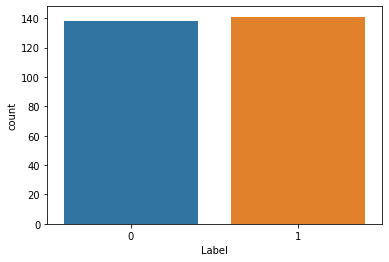

In [17]:
print("\nGraph showning the count of Training datasets")
sns.countplot(data=train_data, x = 'Label', label ='Count')

In [18]:
X_train.head()

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000231981.3,ENSG00000269475.2,ENSG00000201788.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,ENSG00000234943.2,ENSG00000240423.1,ENSG00000060642.9,ENSG00000271616.1,ENSG00000234881.1,ENSG00000236040.1,ENSG00000231105.1,ENSG00000243044.1,ENSG00000182141.8,ENSG00000269416.4,ENSG00000264981.1,ENSG00000275265.1,ENSG00000185105.4,ENSG00000233540.1,ENSG00000102174.8,ENSG00000271647.1,ENSG00000166391.13,ENSG00000270469.1,ENSG00000070087.12,ENSG00000262950.1,ENSG00000255420.1,ENSG00000280038.1,ENSG00000266261.1,...,ENSG00000279778.1,ENSG00000223671.2,ENSG00000134470.18,ENSG00000263573.1,ENSG00000222213.1,ENSG00000214124.3,ENSG00000206836.1,ENSG00000066044.12,ENSG00000264491.1,ENSG00000146587.16,ENSG00000278151.1,ENSG00000228658.1,ENSG00000173930.8,ENSG00000107863.15,ENSG00000199892.2,ENSG00000221760.1,ENSG00000253333.1,ENSG00000213782.6,ENSG00000146707.13,ENSG00000212084.2,ENSG00000248838.2,ENSG00000135094.9,ENSG00000255083.1,ENSG00000223665.1,ENSG00000231612.1,ENSG00000238300.1,ENSG00000267200.1,ENSG00000203729.7,ENSG00000272515.1,ENSG00000009694.12,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
1,0.000000,0.006431,1.49737,0,0.598584,2.39426,0,0.006599,5.36203,0.000000,0.0,0.0,0,3.14155,0.052944,0.000000,4.08862,0.165141,0.00000,2.02220,0.0,0.0,0.0,0.026366,0.0,0.665222,0.009972,0,0.0,0.013356,0.000000,0.085255,0.0,0.471577,0.000000,1.38306,0.0,0.0,0.000000,0.056633,...,0.010644,0.0,1.07055,0,0.0,0.000000,0.0,3.60752,0.000000,1.580360,0,0.0,0.942195,2.101540,0.0,0.0,0.000000,0.131263,1.240940,0,0.0,5.27446,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.057654,0,0.812853,0.0,0.208534,0.147081,4.05334,0.368102,0,0.182464,0.0
2,0.000000,0.000000,1.28544,0,1.366550,2.36780,0,0.005341,5.58494,0.100262,0.0,0.0,0,3.95277,0.099345,0.000000,3.76403,0.287793,0.00000,2.92825,0.0,0.0,0.0,0.031936,0.0,0.672096,0.000000,0,0.0,0.016193,0.000000,0.024863,0.0,5.159530,0.048528,1.07927,0.0,0.0,0.000000,0.068448,...,0.063415,0.0,2.68149,0,0.0,0.159073,0.0,3.18331,0.000000,1.544650,0,0.0,1.948860,2.060370,0.0,0.0,0.377538,0.157818,1.263840,0,0.0,5.05838,0.0,0.0,0.086874,0.0,0.0,0.000000,0.000000,1.515390,0,6.645780,0.0,0.170978,0.176644,2.90339,0.262281,0,0.386022,0.0
3,0.201191,0.000000,1.45312,0,1.566180,2.84619,0,0.006135,6.19035,0.039225,0.0,0.0,0,4.27160,0.090215,0.137272,3.79982,0.000000,0.04771,2.32443,0.0,0.0,0.0,0.129997,0.0,0.723979,0.063683,0,0.0,0.024732,0.075411,0.282570,0.0,2.409420,0.000000,1.94401,0.0,0.0,0.009122,0.334003,...,0.029490,0.0,3.02538,0,0.0,0.000000,0.0,2.92446,0.000000,1.529490,0,0.0,0.686639,2.600370,0.0,0.0,0.156467,0.250635,0.772264,0,0.0,8.97679,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.262291,0,5.085340,0.0,0.067894,0.000000,3.70349,0.422939,0,0.666707,0.0
7,0.000000,0.000000,2.04426,0,0.471326,1.23411,0,0.000000,7.60369,0.133169,0.0,0.0,0,2.99718,0.000000,0.041504,6.99522,0.000000,0.00000,2.77129,0.0,0.0,0.0,0.028640,0.0,0.035726,0.000000,0,0.0,0.000000,0.000000,0.033310,0.0,3.289580,0.043545,2.70794,0.0,0.0,0.000000,0.177050,...,0.023044,0.0,1.91745,0,0.0,0.000000,0.0,2.35523,0.000000,0.374472,0,0.0,0.006706,0.730904,0.0,0.0,0.000000,0.042064,0.678911,0,0.0,6.37584,0.0,0.0,0.000000,0.0,0.0,0.047655,0.078803,0.000000,0,4.845330,0.0,0.079093,0.081800,1.89896,0.669688,0,0.570944,0.0
8,0.000000,0.006257,1.96069,0,1.610100,4.46328,0,0.031820,7.09522,0.000000,0.0,0.0,0,3.77354,0.065929,0.349665,3.85250,0.000000,0.00000,2.25547,0.0,0.0,0.0,0.147520,0.0,1.088440,0.009703,0,0.0,0.088604,0.078836,0.092471,0.0,2.129170,0.114067,3.18608,0.0,0.0,0.000000,0.698869,...,0.030851,0.0,3.22305,0,0.0,0.000000,0.0,3.41259,0.420573,2.119630,0,0.0,1.390690,2.111520,0.0,0.0,0.000000,0.608949

In [19]:
##Doing the same thing for testing data

testing_data.head()

,id,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000231981.3,ENSG00000269475.2,ENSG00000201788.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,ENSG00000234943.2,ENSG00000240423.1,ENSG00000060642.9,ENSG00000271616.1,ENSG00000234881.1,ENSG00000236040.1,ENSG00000231105.1,ENSG00000243044.1,ENSG00000182141.8,ENSG00000269416.4,ENSG00000264981.1,ENSG00000275265.1,ENSG00000185105.4,ENSG00000233540.1,ENSG00000102174.8,ENSG00000271647.1,ENSG00000166391.13,ENSG00000270469.1,ENSG00000070087.12,ENSG00000262950.1,ENSG00000255420.1,ENSG00000280038.1,...,ENSG00000279778.1,ENSG00000223671.2,ENSG00000134470.18,ENSG00000263573.1,ENSG00000222213.1,ENSG00000214124.3,ENSG00000206836.1,ENSG00000066044.12,ENSG00000264491.1,ENSG00000146587.16,ENSG00000278151.1,ENSG00000228658.1,ENSG00000173930.8,ENSG00000107863.15,ENSG00000199892.2,ENSG00000221760.1,ENSG00000253333.1,ENSG00000213782.6,ENSG00000146707.13,ENSG00000212084.2,ENSG00000248838.2,ENSG00000135094.9,ENSG00000255083.1,ENSG00000223665.1,ENSG00000231612.1,ENSG00000238300.1,ENSG00000267200.1,ENSG00000203729.7,ENSG00000272515.1,ENSG00000009694.12,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,3001,0.000000,0.006764,1.68576,0.0,1.046760,2.56965,0,0.000000,5.38054,0.000000,0.046819,0.0,0,3.58103,0.055638,0.000000,3.72403,0.089203,0.027188,3.25170,0.0,0.0,0.0,0.094775,0,0.556439,0.020898,0.0,0.074298,0.014045,0.000000,0.114854,0.0,4.577280,0.000000,2.790900,0.000000,0,0.000000,...,0.055122,0.0,2.38341,0.0,0.0,0.138859,0.0,2.68180,0.0,1.321590,0,0,0.076007,1.96427,0.0,0.0,0.000000,0.274918,0.637475,0,0.0,9.36480,0.000000,0.0,0.00000,0.000000,0,0.000000,0.00000,0.890635,0,6.30029,0,0.076595,0.000000,3.02069,0.196880,0,0.538068,0.0
1,3002,0.247055,0.000000,1.89639,0.0,1.996530,2.47638,0,0.016952,5.98824,0.228977,0.000000,0.0,0,3.88829,0.022174,0.036970,5.63139,0.000000,0.000000,1.92491,0.0,0.0,0.0,0.038082,0,0.231347,0.000000,0.0,0.000000,0.000000,0.152675,0.124350,0.0,0.581713,0.000000,1.208350,0.000000,0,0.000000,...,0.020512,0.0,2.62413,0.0,0.0,0.000000,0.0,2.89655,0.0,1.166620,0,0,0.286427,1.62729,0.0,0.0,0.000000,0.183897,0.945893,0,0.0,8.82558,0.039959,0.0,0.13605,0.000000,0,0.042460,0.00000,0.046231,0,5.04563,0,0.137816,0.000000,3.56454,0.397989,0,0.574163,0.0
2,3003,0.026951,0.000000,1.80290,0.0,1.568690,1.90269,0,0.007726,5.97967,0.096880,0.000000,0.0,0,4.60587,0.145780,0.044668,3.92839,0.000000,0.000000,2.96144,0.0,0.0,0.0,0.000000,0,0.589913,0.342651,0.0,0.082496,0.015631,0.225325,0.205505,0.0,2.871280,0.000000,3.740750,0.028376,0,0.005754,...,0.452739,0.0,1.47090,0.0,0.0,0.000000,0.0,2.98594,0.0,1.391490,0,0,1.319570,2.54970,0.0,0.0,0.282757,0.145683,1.875370,0,0.0,9.17941,0.000000,0.0,0.00000,0.220681,0,0.000000,0.11190,0.821460,0,6.00935,0,0.000000,0.044642,3.64769,0.217624,0,0.135791,0.0
3,3004,0.000000,0.000000,1.51205,0.0,0.938359,1.81372,0,0.003923,6.46130,0.000000,0.000000,0.0,0,3.54453,0.000000,0.162988,3.75278,0.000000,0.000000,2.78831,0.0,0.0,0.0,0.000000,0,0.244819,0.000000,0.0,0.063180,0.000000,0.207027,0.004596,0.0,3.612930,0.000000,0.978969,0.000000,0,0.000000,...,0.065141,0.0,1.62822,0.0,0.0,0.000000,0.0,2.46364,0.0,0.970776,0,0,0.010976,1.08158,0.0,0.0,0.000000,0.175459,1.471490,0,0.0,4.76027,0.000000,0.0,0.00000,0.000000,0,0.077311,0.00000,0.002277,0,5.51651,0,0.127467,0.000000,2.88242,0.612775,0,0.807993,0.0
4,3005,0.643548,0.000000,1.35997,0.0,1.254810,3.64841,0,0.128797,6.27939,0.033555,0.000000,0.0,0,4.64838,0.083154,0.030416,4.05267,0.132574,0.000000,3.20535,0.0,0.0,0.0,0.041627,0,0.934724,0.492960,0.0,0.110695,0.041978,0.000000,0.786331,0.0,2.278860,0.317394,3.630710,0.000000,0,0.000000,...,0.856820,0.0,3.22773,0.0,0.0,0.000000,0.0,3.29396,0.0,1.730040,0,0,0.331706,2

In [0]:
X_test = testing_data.drop(['id'],axis=1)

In [21]:
X_test.head()

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000231981.3,ENSG00000269475.2,ENSG00000201788.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,ENSG00000234943.2,ENSG00000240423.1,ENSG00000060642.9,ENSG00000271616.1,ENSG00000234881.1,ENSG00000236040.1,ENSG00000231105.1,ENSG00000243044.1,ENSG00000182141.8,ENSG00000269416.4,ENSG00000264981.1,ENSG00000275265.1,ENSG00000185105.4,ENSG00000233540.1,ENSG00000102174.8,ENSG00000271647.1,ENSG00000166391.13,ENSG00000270469.1,ENSG00000070087.12,ENSG00000262950.1,ENSG00000255420.1,ENSG00000280038.1,ENSG00000266261.1,...,ENSG00000279778.1,ENSG00000223671.2,ENSG00000134470.18,ENSG00000263573.1,ENSG00000222213.1,ENSG00000214124.3,ENSG00000206836.1,ENSG00000066044.12,ENSG00000264491.1,ENSG00000146587.16,ENSG00000278151.1,ENSG00000228658.1,ENSG00000173930.8,ENSG00000107863.15,ENSG00000199892.2,ENSG00000221760.1,ENSG00000253333.1,ENSG00000213782.6,ENSG00000146707.13,ENSG00000212084.2,ENSG00000248838.2,ENSG00000135094.9,ENSG00000255083.1,ENSG00000223665.1,ENSG00000231612.1,ENSG00000238300.1,ENSG00000267200.1,ENSG00000203729.7,ENSG00000272515.1,ENSG00000009694.12,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,0.000000,0.006764,1.68576,0.0,1.046760,2.56965,0,0.000000,5.38054,0.000000,0.046819,0.0,0,3.58103,0.055638,0.000000,3.72403,0.089203,0.027188,3.25170,0.0,0.0,0.0,0.094775,0,0.556439,0.020898,0.0,0.074298,0.014045,0.000000,0.114854,0.0,4.577280,0.000000,2.790900,0.000000,0,0.000000,0.000000,...,0.055122,0.0,2.38341,0.0,0.0,0.138859,0.0,2.68180,0.0,1.321590,0,0,0.076007,1.96427,0.0,0.0,0.000000,0.274918,0.637475,0,0.0,9.36480,0.000000,0.0,0.00000,0.000000,0,0.000000,0.00000,0.890635,0,6.30029,0,0.076595,0.000000,3.02069,0.196880,0,0.538068,0.0
1,0.247055,0.000000,1.89639,0.0,1.996530,2.47638,0,0.016952,5.98824,0.228977,0.000000,0.0,0,3.88829,0.022174,0.036970,5.63139,0.000000,0.000000,1.92491,0.0,0.0,0.0,0.038082,0,0.231347,0.000000,0.0,0.000000,0.000000,0.152675,0.124350,0.0,0.581713,0.000000,1.208350,0.000000,0,0.000000,0.107576,...,0.020512,0.0,2.62413,0.0,0.0,0.000000,0.0,2.89655,0.0,1.166620,0,0,0.286427,1.62729,0.0,0.0,0.000000,0.183897,0.945893,0,0.0,8.82558,0.039959,0.0,0.13605,0.000000,0,0.042460,0.00000,0.046231,0,5.04563,0,0.137816,0.000000,3.56454,0.397989,0,0.574163,0.0
2,0.026951,0.000000,1.80290,0.0,1.568690,1.90269,0,0.007726,5.97967,0.096880,0.000000,0.0,0,4.60587,0.145780,0.044668,3.92839,0.000000,0.000000,2.96144,0.0,0.0,0.0,0.000000,0,0.589913,0.342651,0.0,0.082496,0.015631,0.225325,0.205505,0.0,2.871280,0.000000,3.740750,0.028376,0,0.005754,0.033436,...,0.452739,0.0,1.47090,0.0,0.0,0.000000,0.0,2.98594,0.0,1.391490,0,0,1.319570,2.54970,0.0,0.0,0.282757,0.145683,1.875370,0,0.0,9.17941,0.000000,0.0,0.00000,0.220681,0,0.000000,0.11190,0.821460,0,6.00935,0,0.000000,0.044642,3.64769,0.217624,0,0.135791,0.0
3,0.000000,0.000000,1.51205,0.0,0.938359,1.81372,0,0.003923,6.46130,0.000000,0.000000,0.0,0,3.54453,0.000000,0.162988,3.75278,0.000000,0.000000,2.78831,0.0,0.0,0.0,0.000000,0,0.244819,0.000000,0.0,0.063180,0.000000,0.207027,0.004596,0.0,3.612930,0.000000,0.978969,0.000000,0,0.000000,0.050567,...,0.065141,0.0,1.62822,0.0,0.0,0.000000,0.0,2.46364,0.0,0.970776,0,0,0.010976,1.08158,0.0,0.0,0.000000,0.175459,1.471490,0,0.0,4.76027,0.000000,0.0,0.00000,0.000000,0,0.077311,0.00000,0.002277,0,5.51651,0,0.127467,0.000000,2.88242,0.612775,0,0.807993,0.0
4,0.643548,0.000000,1.35997,0.0,1.254810,3.64841,0,0.128797,6.27939,0.033555,0.000000,0.0,0,4.64838,0.083154,0.030416,4.05267,0.132574,0.000000,3.20535,0.0,0.0,0.0,0.041627,0,0.934724,0.492960,0.0,0.110695,0.041978,0.000000,0.786331,0.0,2.278860,0.317394,3.630710,0.000000,0,0.000000,1.372210,...,0.856820,0.0,3.22773,0.0,0.0,0.000000,0.0,

In [0]:
##So data we have is :
##        X_train 
##        Y_train
##        X_test 

In [23]:
len(X_train)

279

In [24]:
len(Y_train)

279

### Scaling Vectors

In [0]:
#scaling of the data using min-max scaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Reduction

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components = 75)

In [28]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=75, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_train_pca = pca.transform(X_train)

In [30]:
X_train_pca.shape

(279, 75)

In [0]:
X_test_pca = pca.transform(X_test)

In [32]:
X_test_pca.shape

(71, 75)

## Appying Nueral Networks

In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

classifier = Sequential()

In [0]:
classifier.add(Dense(12, input_dim=75, activation='relu'))

In [0]:
classifier.add(Dense(8,activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [0]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
classifier.fit(X_train_pca,Y_train,epochs=25,batch_size=10)

Epoch 1/25
28/28 [==============================] - 0s 1ms/step - loss: 1.0996 - accuracy: 0.4731
Epoch 2/25
28/28 [==============================] - 0s 1ms/step - loss: 0.8192 - accuracy: 0.4946
Epoch 3/25
28/28 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5305
Epoch 4/25
28/28 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.6057
Epoch 5/25
28/28 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.6595
Epoch 6/25
28/28 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.6667
Epoch 7/25
28/28 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.6989
Epoch 8/25
28/28 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7133
Epoch 9/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7491
Epoch 10/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4788 - accuracy: 0.7599
Epoch 11/25
28/28 [

In [0]:
y_test_predict = classifier.predict_classes(X_test_pca)

In [0]:
y_test_list = []
for i in y_test_predict:
    if i[0] == 0:
        y_test_list.append(1)
    else:
        y_test_list.append(-1) 
  # print(i[0])

In [0]:
final = np.array(y_test_list)

In [89]:
final    ## Final Prediction has completed . (73.03%)

array([ 1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1, -1])

In [0]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(Y_train,classifier.predict_classes(X_train_pca))

0.9068100358422939

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [0]:
log_roc_auc_nn = roc_auc_score(Y_train,classifier.predict_classes(X_train_pca))

In [0]:
log_roc_auc_nn_1 = roc_auc_score(Y_train,classifier.predict_proba(X_train_pca)[:,0])

In [78]:
log_roc_auc_nn_1

0.9618151916949327

In [0]:
fpr, tpr, threshold = roc_curve(Y_train,classifier.predict_proba(X_train_pca)[:,0])

<function matplotlib.pyplot.show>

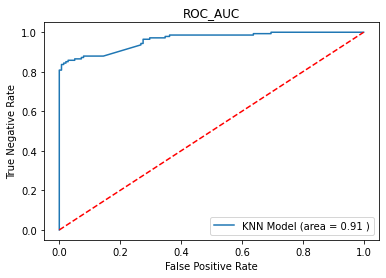

In [80]:
plt.figure()
plt.plot(fpr,tpr,label="KNN Model (area = %0.2f )" % log_roc_auc_nn)
plt.title('ROC_AUC')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show

In [0]:
## To download as csv file to upload in kaggle competition

In [0]:
np.savetxt("f.csv", fina , delimiter=",")